In [65]:
#import dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import figure
import gmaps

#create dataframe for our data
home_df = pd.read_csv('Neighborhood_Zhvi_AllHomes.csv')

#filter for data just in Atlanta. Also drop data that does not have data as of Jan 2015
home_df = home_df[home_df["City"] == 'Atlanta']

#create summary columns for our dataset
home_df["PercentChange"] = 0
home_df["InitialValue"] = 0
home_df["FinalValue"] = 0
home_df["MonthCount"] = 0


#scripting to calculate Initial Value (median house value as of 01-2015), Final Median Housing Value, Number of Months of Data
#and Percent Change over data range
for index, row in home_df.iterrows():
    PercentChange = 0
    InitialValue = 0
    FinalValue = 0
    month = 11
    month_count = 0
    year = 2015
    while (month != 12 or year != 2019):
        if month_count >= 1:
            month_count+=1
        year_str = str(year)
        if month < 10:
            month_str = '0' + str(month)
        else:
            month_str = str(month)
        if not np.isnan(home_df.loc[index, year_str + '-' + month_str]) and InitialValue == 0:
            InitialValue = home_df.loc[index, year_str + '-' + month_str]
            home_df["InitialValue"][index] = InitialValue
            month_count+=1
        if month == 11 and year == 2019:
            home_df["FinalValue"][index] = home_df.loc[index, year_str + '-' + month_str] 
            home_df["MonthCount"][index] = month_count
        if month == 12:
            month = 1
            year+=1
        else:
            month+=1

home_df["Percent Change"] = (home_df["FinalValue"] - home_df["InitialValue"]) / home_df["InitialValue"]  * 100
cols = ["RegionName", "City", "State", "InitialValue", "FinalValue", "Percent Change"]
home_df = home_df[cols]



C:\Users\TaylorP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\TaylorP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\TaylorP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [66]:
home_df = home_df[home_df["Percent Change"] < 4]

In [67]:
home_df = home_df.sort_values(by= "Percent Change")
home_df

,RegionName,City,State,InitialValue,FinalValue,Percent Change
8538,Ben Hill Acres,Atlanta,GA,151003,134999,-10.598465
8602,Fairburn Road - Wisteria Lane,Atlanta,GA,143092,132695,-7.265955
5635,Ridgedale Park,Atlanta,GA,321351,326146,1.492138


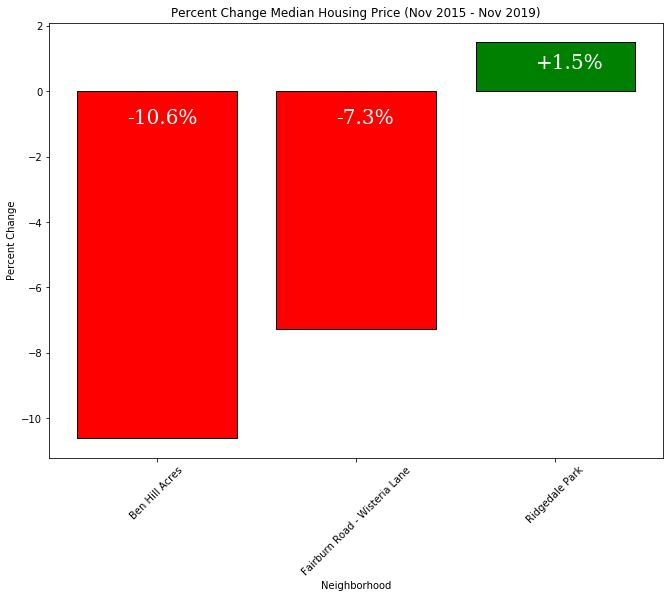

In [82]:
plt.bar(x = home_df["RegionName"], height = home_df["Percent Change"], color = ['red', 'red', 'green'], edgecolor = 'black')
plt.title("Percent Change Median Housing Price (Nov 2015 - Nov 2019)")
plt.xlabel("Neighborhood")
plt.ylabel("Percent Change")
plt.text(x = -0.15, y = -1, s = "-10.6%", c = "white", fontdict = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 20,
        })
plt.text(x=0.9, y = -1, s = "-7.3%", c= "white", fontdict = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 20,
        })
plt.text(x=1.9, y=0.7, s="+1.5%", c="white", fontdict = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 20,
        })
plt.xticks(rotation=45)
fig = plt.gcf()
fig.set_size_inches(11, 8)
fig.savefig('Declining.png', dpi=100)